# COVID-19 Simulation (XMILE)

add text

* bullet point
* point poiunt

![Image](images/sir_model.png)

In [1]:
from BPTK_Py.bptk import bptk 
import pandas as pd

bptk = bptk()

In [3]:
%run src/dashboard/sir_dashboard_xmile.ipy

## Base scenario

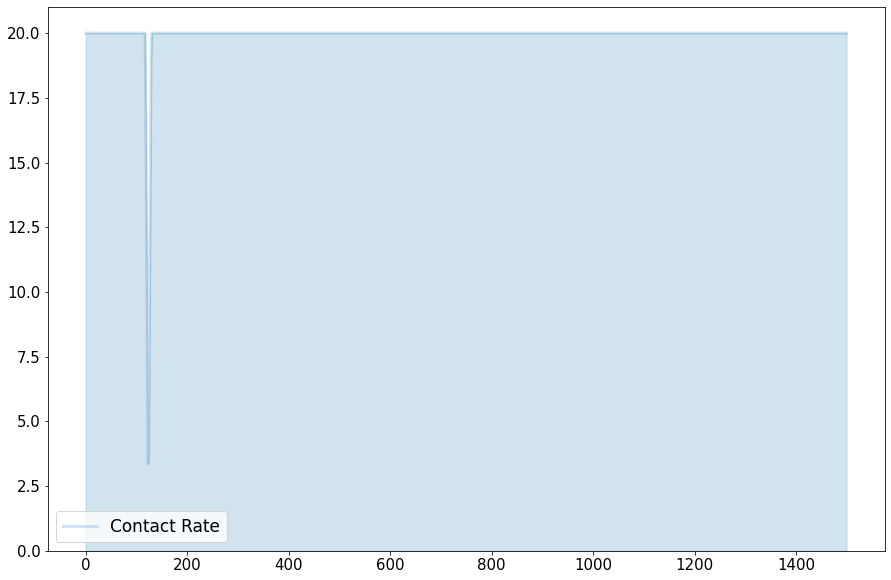

In [4]:
model_base=bptk.scenario_manager_factory.scenario_managers['smSirXMILE'].scenarios['base'].model
ax = pd.DataFrame([model_base.equations["contactRateC"](t) for t in range(model_base.starttime,model_base.stoptime+1)]).plot(kind="area",alpha=0.2,figsize=(15,10))
ax.legend(["Contact Rate"])

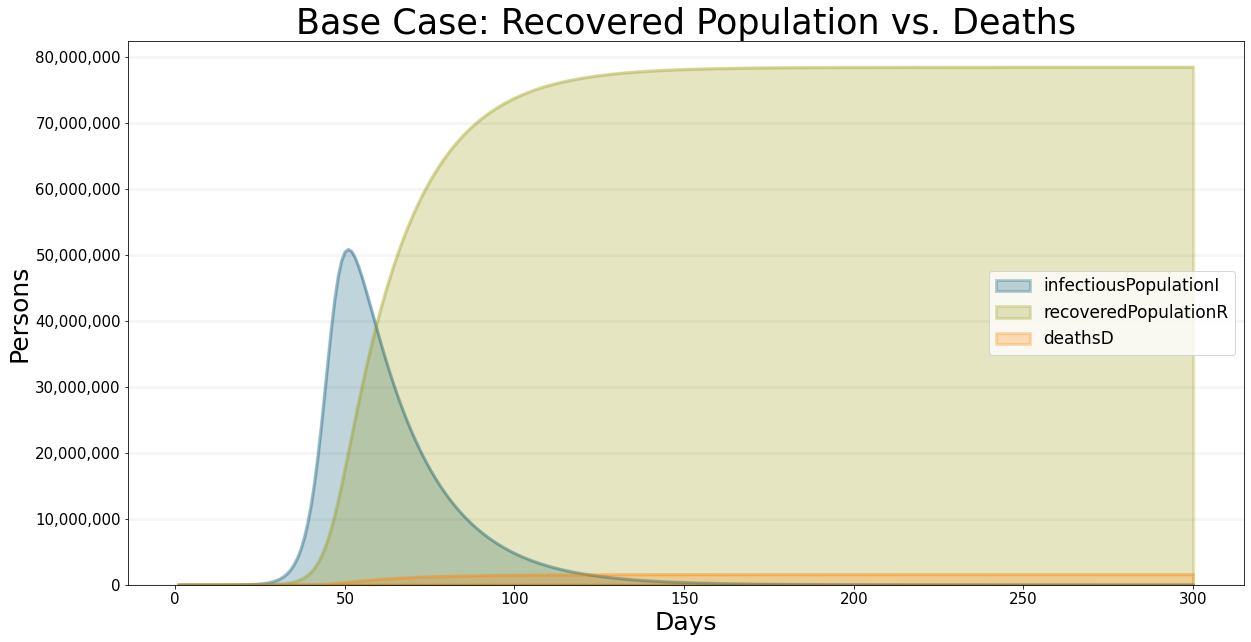

In [5]:
bptk.plot_scenarios(
    scenario_managers=["smSirXMILE"],
    scenarios=["base"],
    title="Base Case: Recovered Population vs. Deaths",
    x_label="Days",
    y_label="Persons",
    equations=["infectiousPopulationI","recoveredPopulationR","deathsD"],
    series_names={
        "smSir_base_infectiousPopulationI" : "Infectious Population",
        "smSir_base_recoveredPopulationR" : "Recovered Population",
        "smSir_base_deathsD": "Deaths"
    },
    visualize_to_period=300
)

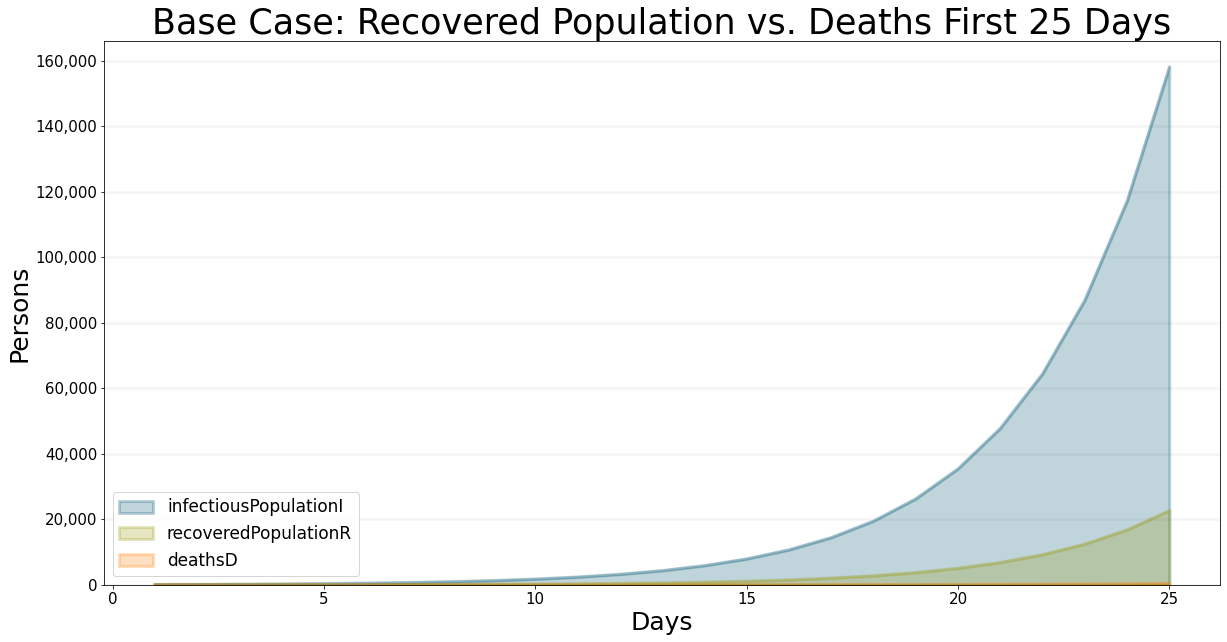

In [6]:
bptk.plot_scenarios(
    scenario_managers=["smSirXMILE"],
    scenarios=["base"],
    title="Base Case: Recovered Population vs. Deaths First 25 Days",
    x_label="Days",
    y_label="Persons",
    equations=["infectiousPopulationI","recoveredPopulationR","deathsD"],
    series_names={
        "smSir_base_infectiousPopulationI" : "Infectious Population",
        "smSir_base_recoveredPopulationR" : "Recovered Population",
        "smSir_base_deathsD": "Deaths"
    },
    visualize_from_period=0,
    visualize_to_period=25
)

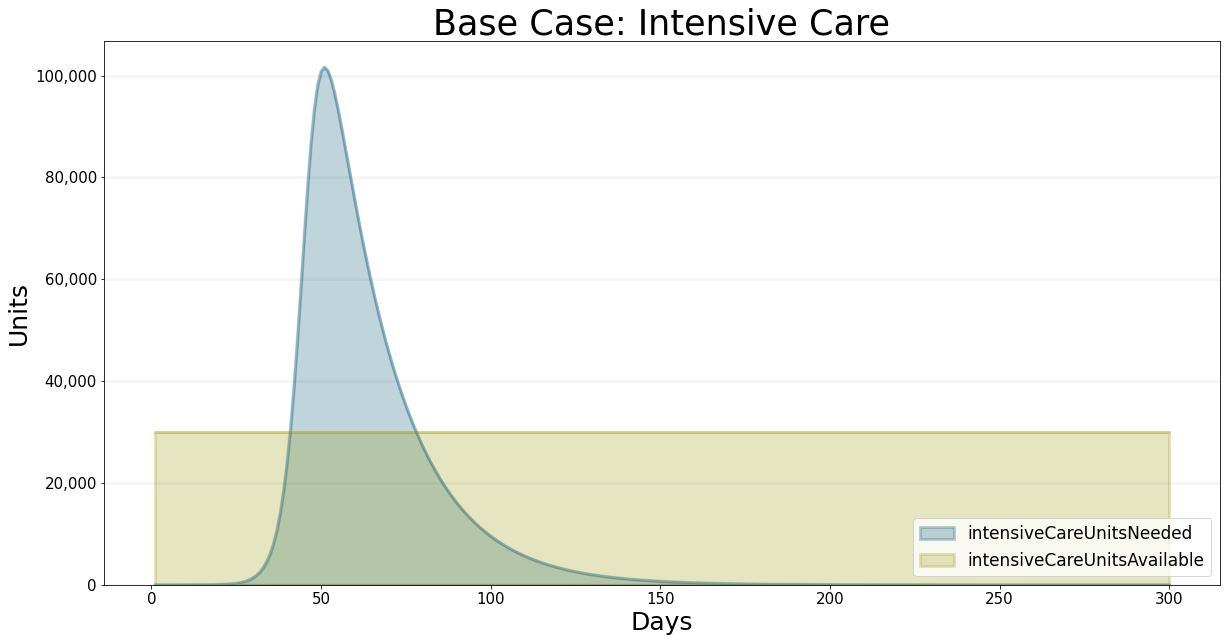

In [7]:
bptk.plot_scenarios(
    scenario_managers=["smSirXMILE"],
    scenarios=["base"],
    title="Base Case: Intensive Care",
    x_label="Days",
    y_label="Units",
    equations=["intensiveCareUnitsNeeded","intensiveCareUnitsAvailable"],
    series_names={
        "smSir_base_intensiveCareUnitsNeeded" : "Intensive Care Needed",
        "smSir_base_intensiveCareUnitsAvailable" : "Intensive Care Available"  
    },
    visualize_to_period=300
)

In [8]:
from BPTK_Py.sdcompiler.sdmodel import LERP
contact_rate = int(bptk.scenario_manager_factory.scenario_managers['smSirXMILE'].scenarios['base'].model.equations['contactRateC'](0))

In [9]:
model_large_groups = bptk.scenario_manager_factory.scenario_managers['smSirXMILE'].scenarios['contactLargeGroups'].model
stoptime_large_groups = model_large_groups.stoptime

points_list_large = []
contact_large = contact_rate
for t in range(stoptime_large_groups):
    if t%40==0 and t!=0 and t < 365:
        contact_large = contact_large - 2
    if t == 600:
        contact_large = 6
    if t == 700:
        contact_large = 10
    if t == 800:
        contact_large = 14
    if t == 900:
        contact_large = 20
    points_list_large.append((t,contact_large))


model_large_groups.points["contactPointsLarge"] = points_list_large
model_large_groups.equations["contactRateC"] = lambda t: LERP(t,model_large_groups.points["contactPointsLarge"])

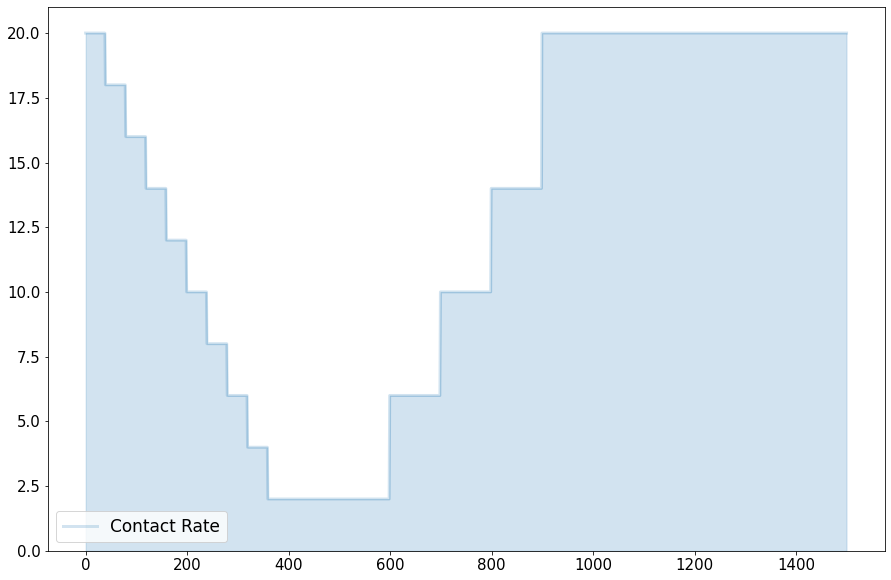

In [10]:
ax = pd.DataFrame([model_large_groups.equations["contactRateC"](t) for t in range(model_large_groups.starttime,model_large_groups.stoptime+1)]).plot(kind="area",alpha=0.2,figsize=(15,10))
ax.legend(["Contact Rate"])

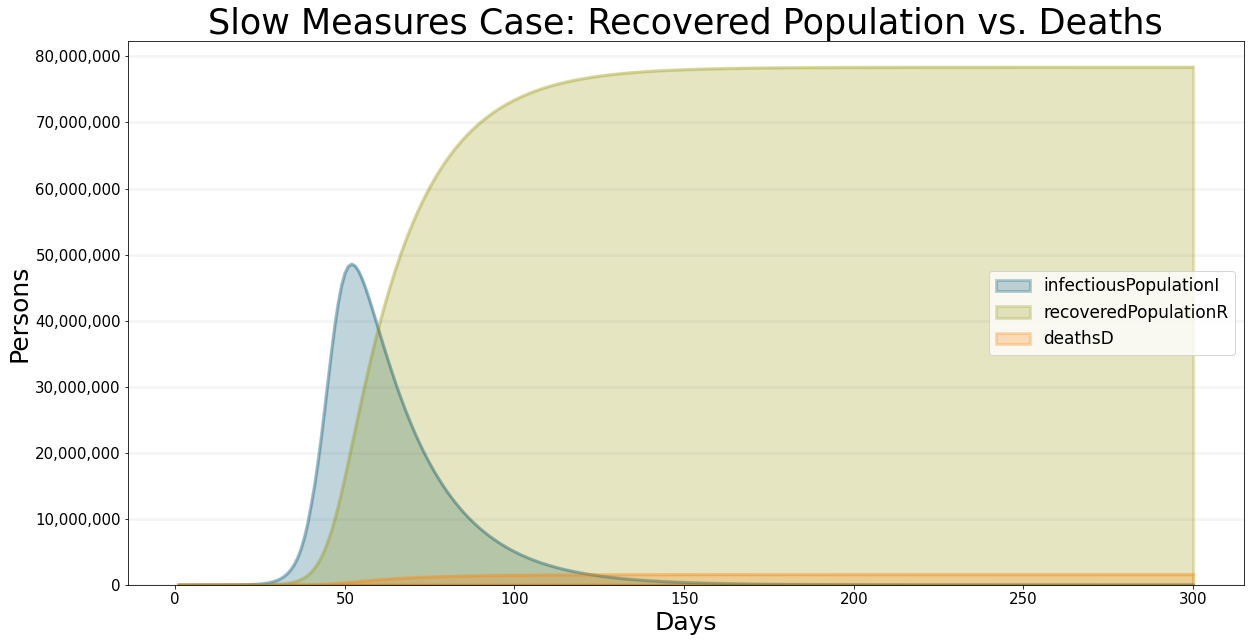

In [11]:
bptk.plot_scenarios(
    scenario_managers=["smSirXMILE"],
    scenarios=["contactLargeGroups"],
    title="Slow Measures Case: Recovered Population vs. Deaths",
    x_label="Days",
    y_label="Persons",
    equations=["infectiousPopulationI","recoveredPopulationR","deathsD"],
    series_names={
        "smSir_contactLargeGroups_infectiousPopulationI" : "Infectious Population",
        "smSir_contactLargeGroups_recoveredPopulationR" : "Recovered Population",
        "smSir_contactLargeGroups_deathsD": "Deaths"
    },
    visualize_to_period=300
)

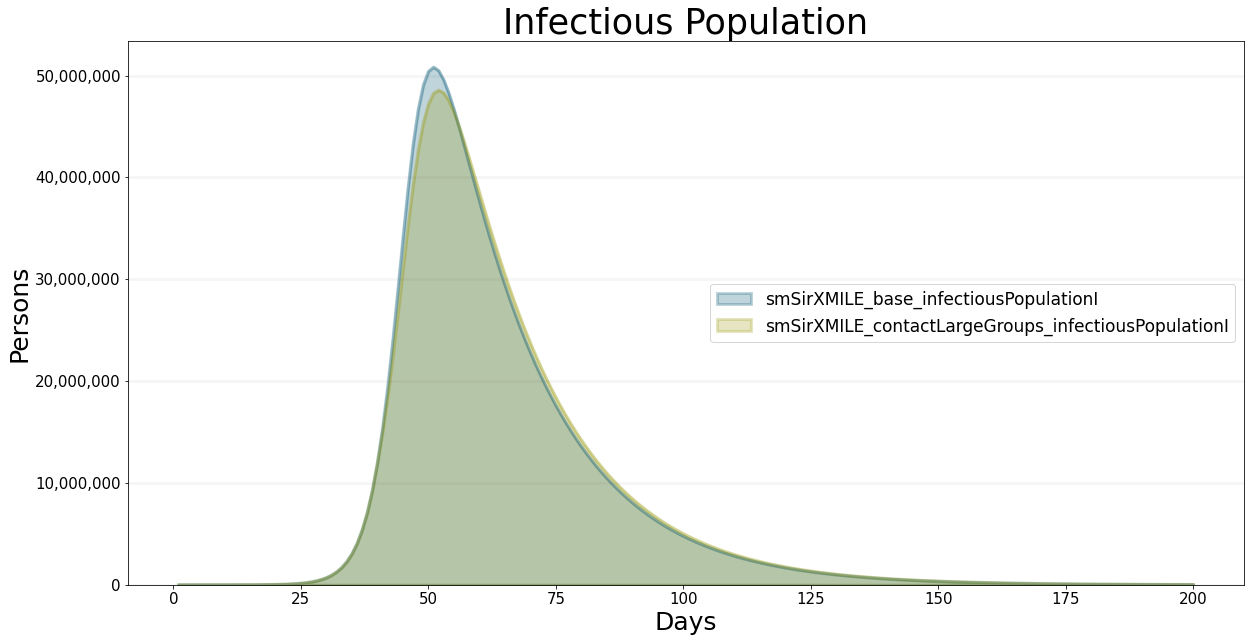

In [12]:
bptk.plot_scenarios(
    scenario_managers=["smSirXMILE"],
    scenarios=["contactLargeGroups","base"],
    title="Infectious Population",
    x_label="Days",
    y_label="Persons",
    equations=["infectiousPopulationI"],
    series_names={
        "smSir_base_infectiousPopulationI" : "Base Case",
        "smSir_contactLargeGroups_infectiousPopulationI" : "Slow Measures"
    },
    visualize_to_period=200
    
)

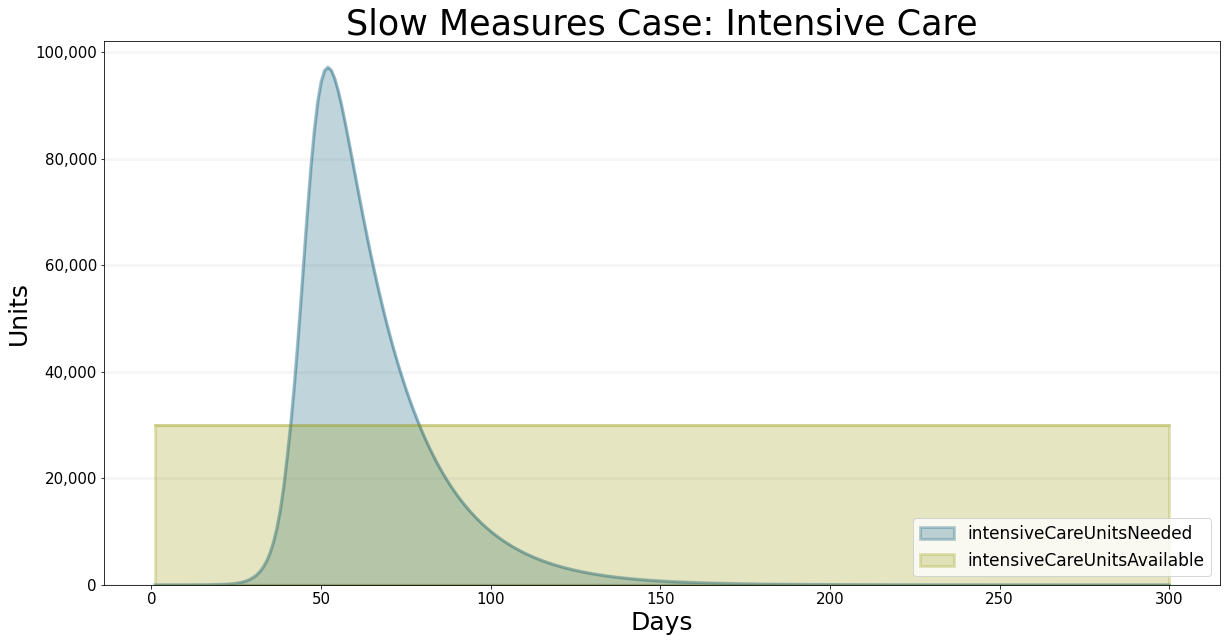

In [13]:
bptk.plot_scenarios(
    scenario_managers=["smSirXMILE"],
    scenarios=["contactLargeGroups"],
    title="Slow Measures Case: Intensive Care",
    x_label="Days",
    y_label="Units",
    equations=["intensiveCareUnitsNeeded","intensiveCareUnitsAvailable"],
    series_names={
        "smSir_contactLargeGroups_intensiveCareUnitsNeeded" : "Intensive Care Needed",
        "smSir_contactLargeGroups_intensiveCareUnitsAvailable" : "Intensive Care Available" 
    },
    visualize_to_period=300
)

#### Reducing the contact rate from large groups to small groups

In [14]:
model_small_groups = bptk.scenario_manager_factory.scenario_managers['smSirXMILE'].scenarios['contactSmallGroups'].model
stoptime_small_groups = model_small_groups.stoptime

points_list_small = []
contact_small = contact_rate
for t in range(stoptime_small_groups):
    if t==25:
        contact_small= 10
    if t==41:
        contact_small = 5
    if t==500:
        contact_small = 10
    if t==1200:
        contact_small = 20
    points_list_small.append((t,contact_small))


model_small_groups.points["contactPointsSmall"] = points_list_small
model_small_groups.equations["contactRateC"] = lambda t: LERP(t,model_small_groups.points["contactPointsSmall"])

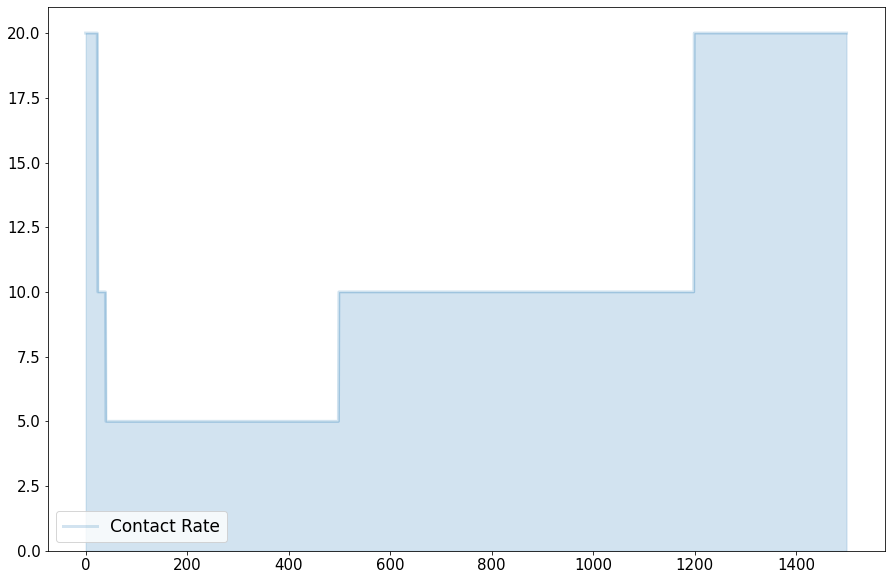

In [15]:
ax = pd.DataFrame([model_small_groups.equations["contactRateC"](t) for t in range(model_small_groups.starttime,model_small_groups.stoptime+1)]).plot(kind="area",alpha=0.2,figsize=(15,10))
ax.legend(["Contact Rate"])

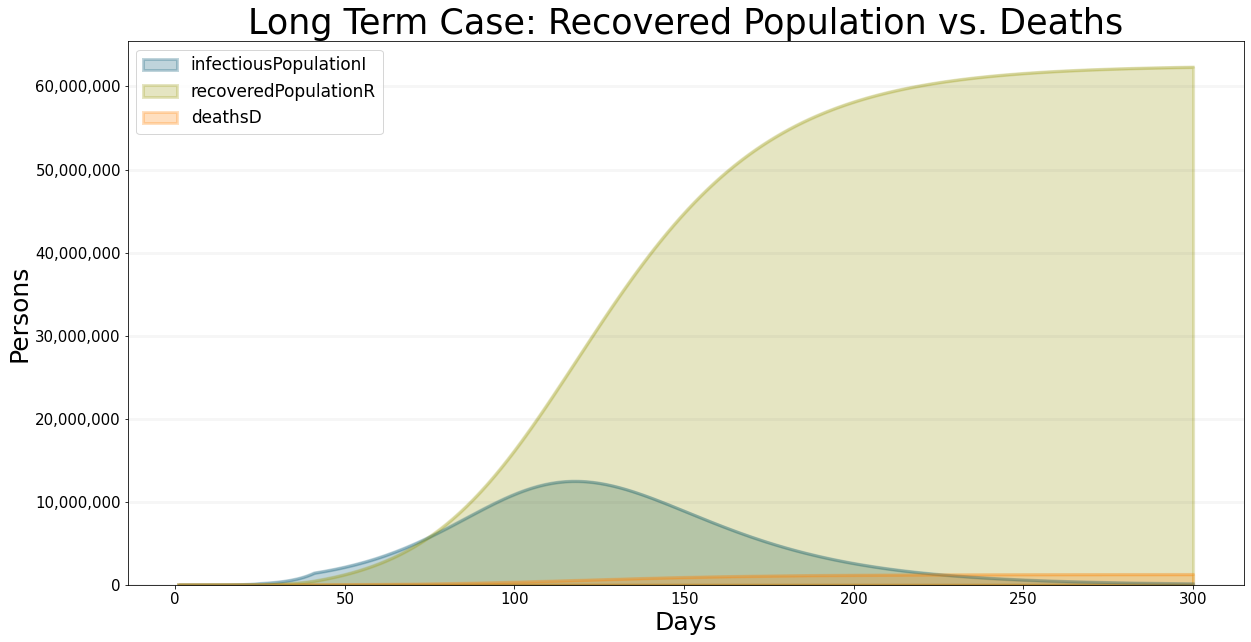

In [16]:
bptk.plot_scenarios(
    scenario_managers=["smSirXMILE"],
    scenarios=["contactSmallGroups"],
    title="Long Term Case: Recovered Population vs. Deaths",
    x_label="Days",
    y_label="Persons",
    equations=["infectiousPopulationI","recoveredPopulationR","deathsD"],
    series_names={
        "smSir_contactSmallGroups_infectiousPopulationI" : "Infectious Population",
        "smSir_contactSmallGroups_recoveredPopulationR" : "Recovered Population",
        "smSir_contactSmallGroups_deathsD": "Deaths"
    },
    visualize_to_period=300
)

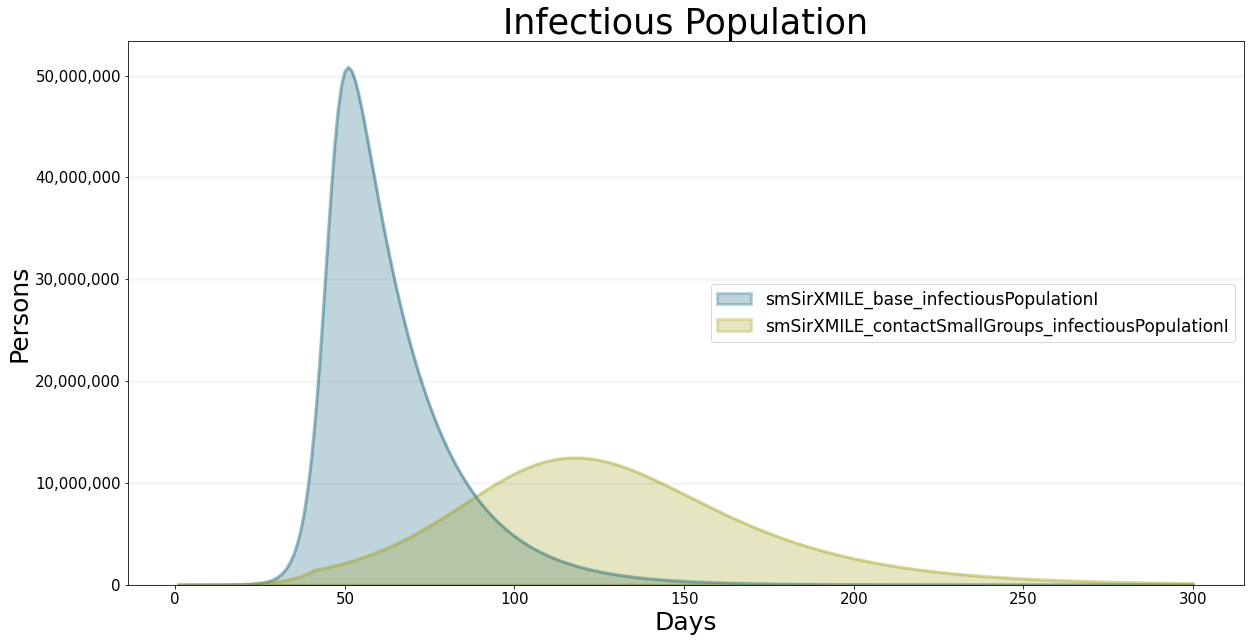

In [17]:
bptk.plot_scenarios(
    scenario_managers=["smSirXMILE"],
    scenarios=["contactSmallGroups","base"],
    title="Infectious Population",
    x_label="Days",
    y_label="Persons",
    equations=["infectiousPopulationI"],
    series_names={
        "smSir_base_infectiousPopulationI" : "Base Case",
        "smSir_contactSmallGroups_infectiousPopulationI" : "Long Term Case"
    },
    visualize_to_period=300
    
)

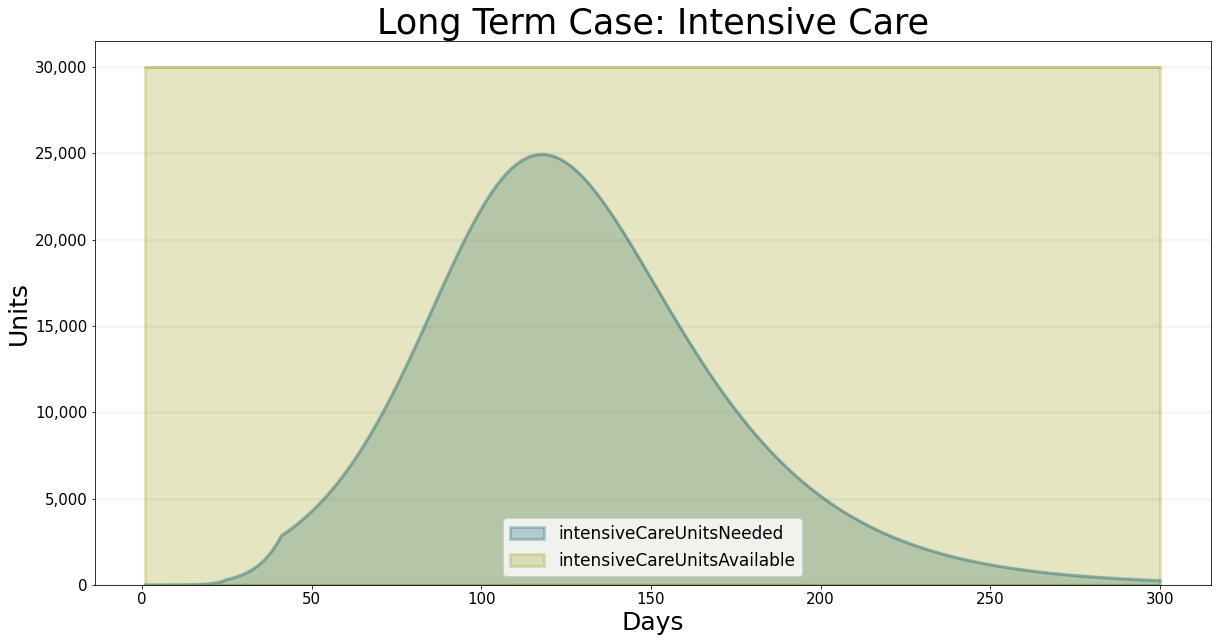

In [18]:
bptk.plot_scenarios(
    scenario_managers=["smSirXMILE"],
    scenarios=["contactSmallGroups"],
    title="Long Term Case: Intensive Care",
    x_label="Days",
    y_label="Units",
    equations=["intensiveCareUnitsNeeded","intensiveCareUnitsAvailable"],
    series_names={
        "smSir_contactSmallGroups_intensiveCareUnitsNeeded" : "Intensive Care Needed",
        "smSir_contactSmallGroups_intensiveCareUnitsAvailable" : "Intensive Care Available" 
    },
    visualize_to_period=300
)

In [19]:
model_two_people = bptk.scenario_manager_factory.scenario_managers['smSirXMILE'].scenarios['contactTwoPeople'].model
stoptime_two_people = model_two_people.stoptime

points_list_two = []
contact_two = contact_rate
for t in range(stoptime_two_people):
    if t==10:
        contact_two = 2
    if t==100:
        contact_two = 20
    points_list_two.append((t,contact_two))


model_two_people.points["contactPointsTwo"] = points_list_two
model_two_people.equations["contactRateC"] = lambda t: LERP(t,model_two_people.points["contactPointsTwo"])

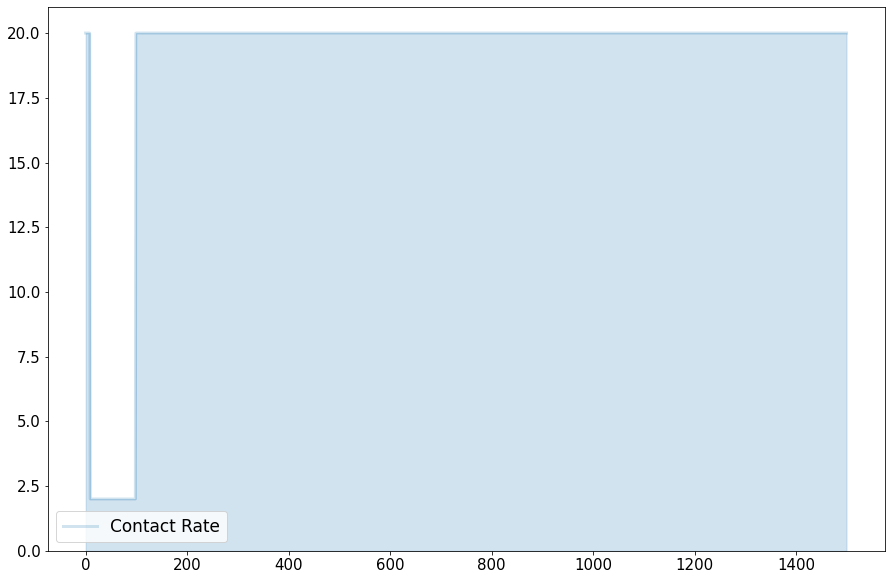

In [20]:
ax = pd.DataFrame([model_two_people.equations["contactRateC"](t) for t in range(model_two_people.starttime,model_two_people.stoptime+1)]).plot(kind="area",alpha=0.2,figsize=(15,10))
ax.legend(["Contact Rate"])

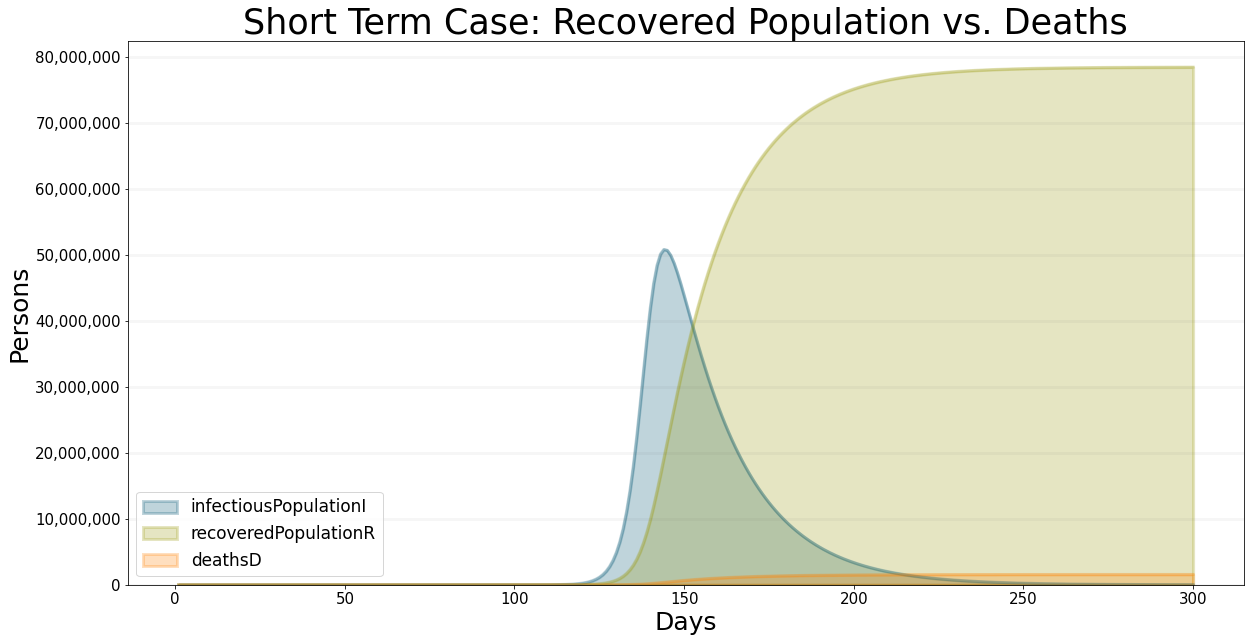

In [21]:
bptk.plot_scenarios(
    scenario_managers=["smSirXMILE"],
    scenarios=["contactTwoPeople"],
    title="Short Term Case: Recovered Population vs. Deaths",
    x_label="Days",
    y_label="Persons",
    equations=["infectiousPopulationI","recoveredPopulationR","deathsD"],
    series_names={
        "smSir_contactTwoPeople_infectiousPopulationI" : "Infectious Population",
        "smSir_contactTwoPeople_recoveredPopulationR" : "Recovered Population",
        "smSir_contactTwoPeople_deathsD": "Deaths"
    },
    visualize_to_period=300
)

In [22]:
bptk.plot_scenarios(
    scenario_managers=["smSir"],
    scenarios=["contactTwoPeople","base"],
    title="Infectious Population",
    x_label="Days",
    y_label="Persons",
    equations=["infectiousPopulationI"],
    series_names={
        "smSir_base_infectiousPopulationI" : "Base Case",
        "smSir_contactTwoPeople_infectiousPopulationI" : "Short Term Case"
    },
    visualize_to_period=300
    
)

2021-07-12 11:19:41.975354, [ERROR] Scenario manager "smSir" not found! Did you maybe mean one of "smSirXMILE"?
2021-07-12 11:19:41.976157, [ERROR] Scenario "contactTwoPeople" not found in any scenario manager!
2021-07-12 11:19:41.976481, [ERROR] Scenario "base" not found in any scenario manager!


AttributeError: 'NoneType' object has no attribute 'columns'

In [ ]:
bptk.plot_scenarios(
    scenario_managers=["smSirXMILE"],
    scenarios=["contactTwoPeople"],
    title="Short Term Case: Intensive Care",
    x_label="Days",
    y_label="Units",
    equations=["intensiveCareUnitsNeeded","intensiveCareUnitsAvailable"],
    series_names={
        "smSir_contactTwoPeople_intensiveCareUnitsNeeded" : "Intensive Care Needed",
        "smSir_contactTwoPeople_intensiveCareUnitsAvailable" : "Intensive Care Available" 
    },
    visualize_to_period=300
)